In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install tensorflow pandas matplotlib scikit-learn

# ***Load Bitcoin Dataset***

In [ ]:
df = pd.read_csv('Bitcoin_Data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"
...,...,...,...,...,...,...,...
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"


# ***Convert the Columns into Numeric by removing comma(,)***


In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",57343.17,58534.36,57330.10,58127.01,58127.01,33835707949
1,"Sep 11, 2024",57650.29,57991.32,55567.34,57343.17,57343.17,37049062672
2,"Sep 10, 2024",57020.10,58029.98,56419.41,57648.71,57648.71,28857630507
3,"Sep 9, 2024",54851.89,58041.13,54598.43,57019.54,57019.54,34618096173
4,"Sep 8, 2024",54147.93,55300.86,53653.76,54841.57,54841.57,18268287531
...,...,...,...,...,...,...,...
1787,"Oct 22, 2019",8243.40,8296.65,8074.46,8078.20,8078.20,16803377857
1788,"Oct 21, 2019",8225.12,8296.69,8196.42,8243.72,8243.72,15868748866
1789,"Oct 20, 2019",7997.81,8281.82,7949.44,8222.08,8222.08,15504249442
1790,"Oct 19, 2019",7973.80,8082.63,7944.78,7988.56,7988.56,13797825640


# ***Check for the Dupliacte Values in 'Date' Column***




In [ ]:
duplicate_rows = df['Date'].duplicated().any()
print(duplicate_rows)
## Apply this on the date column because I want to check no same rows in the dataset

False


# ***check the Dupliacte values in the Numeric cols***

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
duplicate_count = df[numeric_cols].apply(lambda col: col.duplicated().sum())
duplicate_count
## Althogh both the Open and the Low cols contain only one Dupliacte rows but ignored
## Reason to ignore it is that in the Market analysis possible that on the other day the value of opening is same

,0
Open,1
High,0
Low,1
Close,0
Adj Close,0
Volume,0


# ***Check that Either in the Dataset contains any zero(0) value***

In [ ]:
zero_in_columns = (df == 0).any()
zero_in_columns
## which means non of the coulumn contain the zero value it

,0
Date,False
Open,False
High,False
Low,False
Close,False
Adj Close,False
Volume,False


# ***Check for the Null Values in each Column***


In [ ]:
Null_values = df.isnull().sum()
Null_values
## so no need to drop the dupliacte rows as well becuase no duplicate rows exist in the data dataset

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


# ***Detecting Outliers By IQR Method***

In [ ]:
def Detection_Outlier(col):
    Quartile_1 = col.quantile(0.25)
    Quartile_3 = col.quantile(0.75)
    IQR = Quartile_3 - Quartile_1
    lower_bound = Quartile_1 - 1.5 * IQR
    upper_bound = Quartile_3 + 1.5 * IQR
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    return outliers

outliers_open = Detection_Outlier(df['Open'])
outliers_close = Detection_Outlier(df['Close'])
outliers_volume = Detection_Outlier(df['Volume'])
outliers_High = Detection_Outlier(df['High'])
outliers_Low = Detection_Outlier(df['Low'])
outliers_AdjClose = Detection_Outlier(df['Adj Close'])

# Print the results
print("Outliers in 'Open' column:")
print(outliers_open)
print("\nOutliers in 'Close' column:")
print(outliers_close)
print("\nOutliers in 'Volume' column:")
print(outliers_volume)
print("Outliers in 'High' column:")
print(outliers_High)
print("\nOutliers in 'Low' column:")
print(outliers_Low)
print("\nOutliers in 'Adj Close' column:")
print(outliers_AdjClose)

## Leaving outliers of the Volume column intact becuase in financial datasets outliers are often a natural occurrence.
## High trading volumes might be possible due to the huge news that directly affects the market events.
## Removing these outliers could lead to a loss of valuable information about market behavior.

Outliers in 'Open' column:
Series([], Name: Open, dtype: float64)

Outliers in 'Close' column:
Series([], Name: Close, dtype: float64)

Outliers in 'Volume' column:
38      108991085584
176      66792634382
177      74215844794
181      78320453976
190      68750229073
            ...     
1349     67865420765
1365     71378606374
1439     71251776995
1596     66964629541
1644     74156772075
Name: Volume, Length: 75, dtype: int64
Outliers in 'High' column:
Series([], Name: High, dtype: float64)

Outliers in 'Low' column:
Series([], Name: Low, dtype: float64)

Outliers in 'Adj Close' column:
Series([], Name: Adj Close, dtype: float64)


# ***Finding Outliers by Z-Score Method***

In [ ]:
def zScore_calc(col):
    mean = col.mean()
    std = col.std()
    z_scores = (col - mean) / std

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

print("Number of outliers in each column")
for col in numeric_cols:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = df[col][(z_scores > 3) | (z_scores < -3)]
    count = outliers.count()
    print(col, " : ", count)

## same case as IQR the Volumwe column only cotain the outliers so ignore it

Number of outliers in each column
Open  :  0
High  :  0
Low  :  0
Close  :  0
Adj Close  :  0
Volume  :  18


# ***Common Outliers in Volume Column (IQR and Z-Score)***

In [ ]:
iqrOutlier = Detection_Outlier(df['Volume'])

z_scores = (df['Volume'] - df['Volume'].mean()) / df['Volume'].std()
zOutlier = df['Volume'][(z_scores > 3) | (z_scores < -3)]

common = iqrOutlier.index.intersection(zOutlier.index)

print("Common outliers in 'Volume' column (IQR and Z-score):")
df.loc[common, 'Volume']

## Showing common ouliers by taking the intersection of the IQR and the Z-Score Outliers
## Double checking outliers for answer authenticity

Common outliers in 'Volume' column (IQR and Z-score):


,Volume
38,108991085584
191,102802940877
673,102905151606
674,118992465607
1211,88281943359
1212,126358098747
1218,96721152926
1238,86668667320
1243,97468872758
1294,350967941479


# ***Check Uniformity of the Data By Chi-Squared Test***

In [ ]:
from scipy.stats import chisquare

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

def check_uniformity(col):
    hist, bin_edges = np.histogram(df[col], bins='auto') ## observed frequency calculate ho rhi by putting the values in the separate bins
    expected_freq = [len(df[col]) / len(hist)] * len(hist)

    chi2_stat, p_val = chisquare(hist, expected_freq) ## builtin function that check means compare kara ga observed and the expected frequency ko

    return chi2_stat, p_val

for col in numeric_cols:
    chi2_stat, p_val = check_uniformity(col)
    print(f"Chi-Square Test for {col}: Chi2 Stat = {chi2_stat}, p-value = {p_val}")
    if p_val > 0.05:
      print(f"The {col} column is uniformly distributed as: (p-value > 0.05)\n")
    else:
        print(f"The {col} column is not uniformly distributed as: (p-value <= 0.05)\n")

## So As it clearly shows that non of the column is uniformly distributed

Chi-Square Test for Open: Chi2 Stat = 340.3102678571429, p-value = 4.423817578351238e-64
The Open column is not uniformly distributed as: (p-value <= 0.05)

Chi-Square Test for High: Chi2 Stat = 361.25, p-value = 3.3263712333195354e-69
The High column is not uniformly distributed as: (p-value <= 0.05)

Chi-Square Test for Low: Chi2 Stat = 372.0345982142857, p-value = 9.724349663274721e-71
The Low column is not uniformly distributed as: (p-value <= 0.05)

Chi-Square Test for Close: Chi2 Stat = 329.04352678571433, p-value = 1.0119190057665718e-61
The Close column is not uniformly distributed as: (p-value <= 0.05)

Chi-Square Test for Adj Close: Chi2 Stat = 329.04352678571433, p-value = 1.0119190057665718e-61
The Adj Close column is not uniformly distributed as: (p-value <= 0.05)

Chi-Square Test for Volume: Chi2 Stat = 11379.580357142859, p-value = 0.0
The Volume column is not uniformly distributed as: (p-value <= 0.05)



# ***Normalize Data by Min-Max Normalization***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## As all the numerical cols are not unifromly distribute
## so the best choice is to normalize by dataset is Max-min Normalization

cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

minMax = MinMaxScaler()
Normalize_df = df.copy()  # Create another copy of df
Normalize_df[cols] = minMax.fit_transform(df[cols])
Normalize_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",0.768846,0.777607,0.791691,0.780416,0.780416,0.082470
1,"Sep 11, 2024",0.773358,0.769670,0.765470,0.768908,0.768908,0.091767
2,"Sep 10, 2024",0.764101,0.770235,0.778145,0.773393,0.773393,0.068067
3,"Sep 9, 2024",0.732251,0.770398,0.751058,0.764156,0.764156,0.084733
4,"Sep 8, 2024",0.721910,0.730347,0.737006,0.732180,0.732180,0.037430
...,...,...,...,...,...,...,...
1787,"Oct 22, 2019",0.047605,0.043334,0.059016,0.045622,0.045622,0.033192
1788,"Oct 21, 2019",0.047337,0.043334,0.060830,0.048052,0.048052,0.030487
1789,"Oct 20, 2019",0.043998,0.043117,0.057156,0.047734,0.047734,0.029433
1790,"Oct 19, 2019",0.043645,0.040206,0.057087,0.044306,0.044306,0.024496


# ***Graphical Analysis***

# **Univariate Graphical Analysis**

## ***Plotting Histograms***

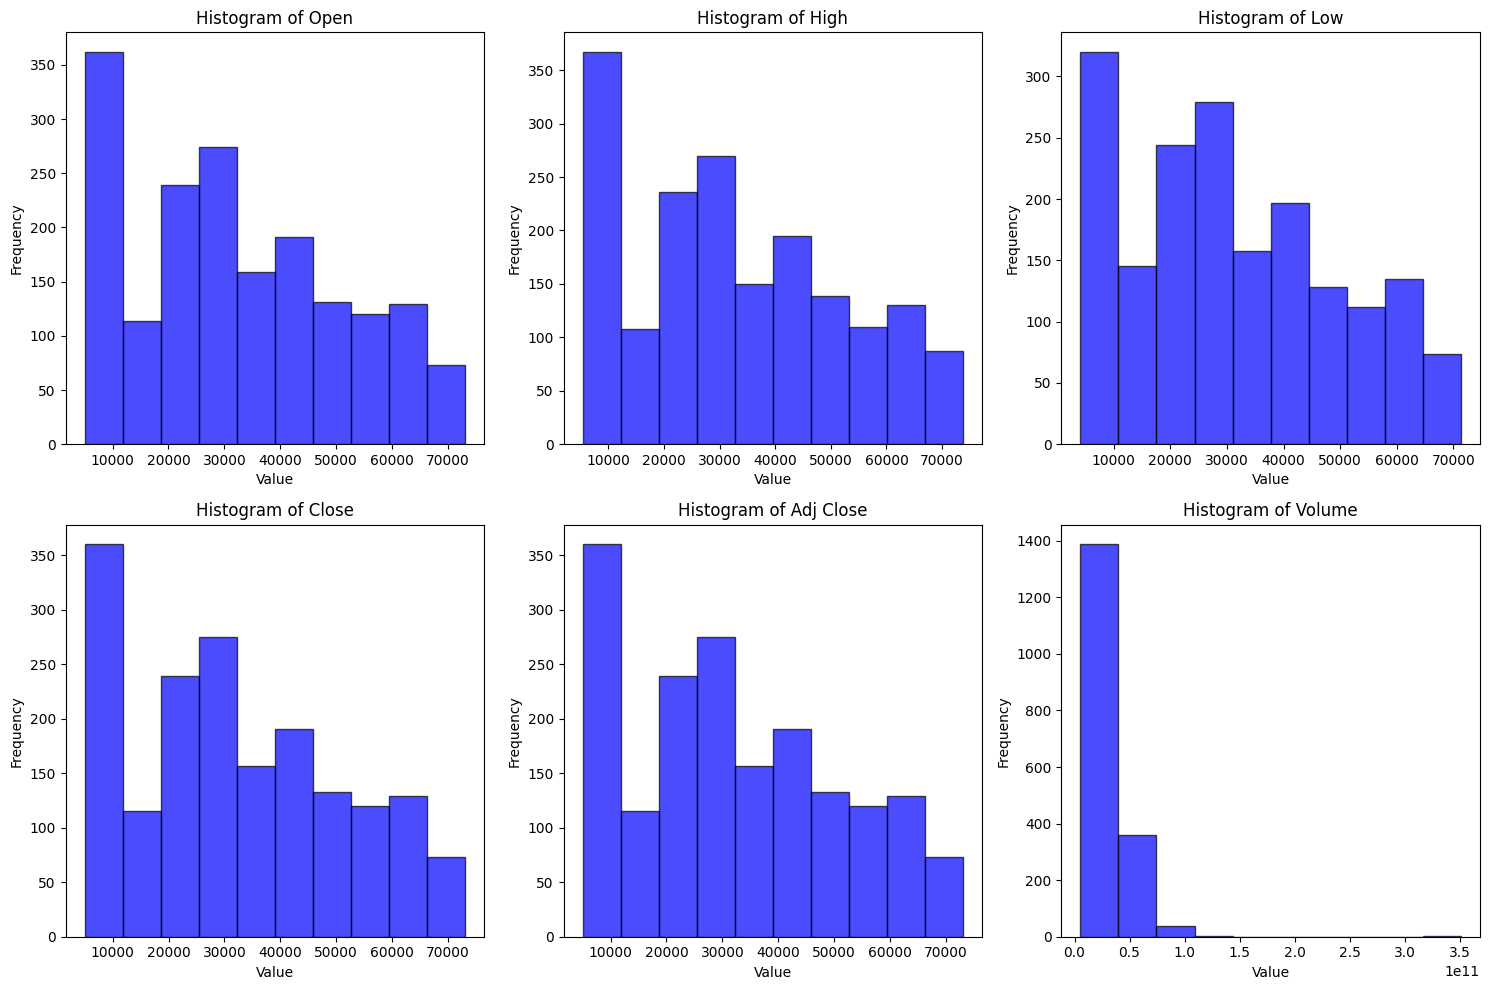

In [ ]:
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=10, alpha=0.7, label=col, color='blue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## **Box plots**

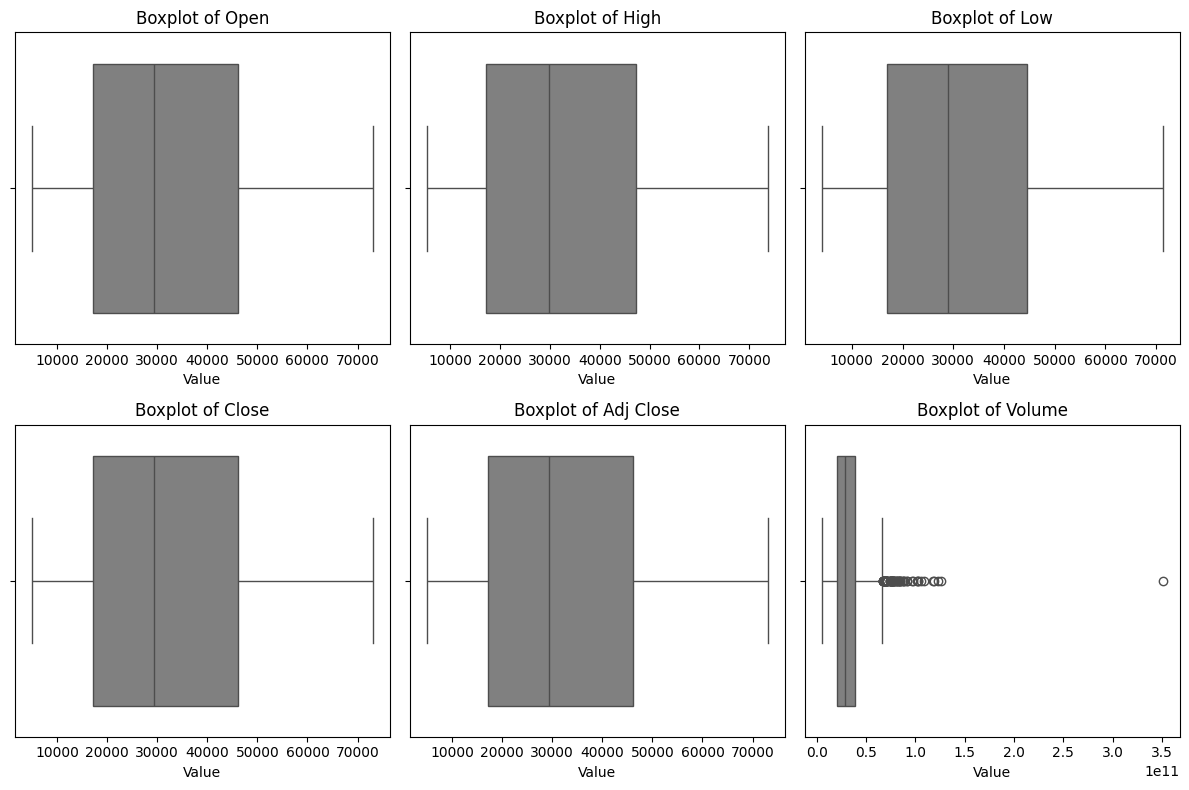

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='gray')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('Value')
plt.tight_layout()
plt.show()


## **Scatter Plots**

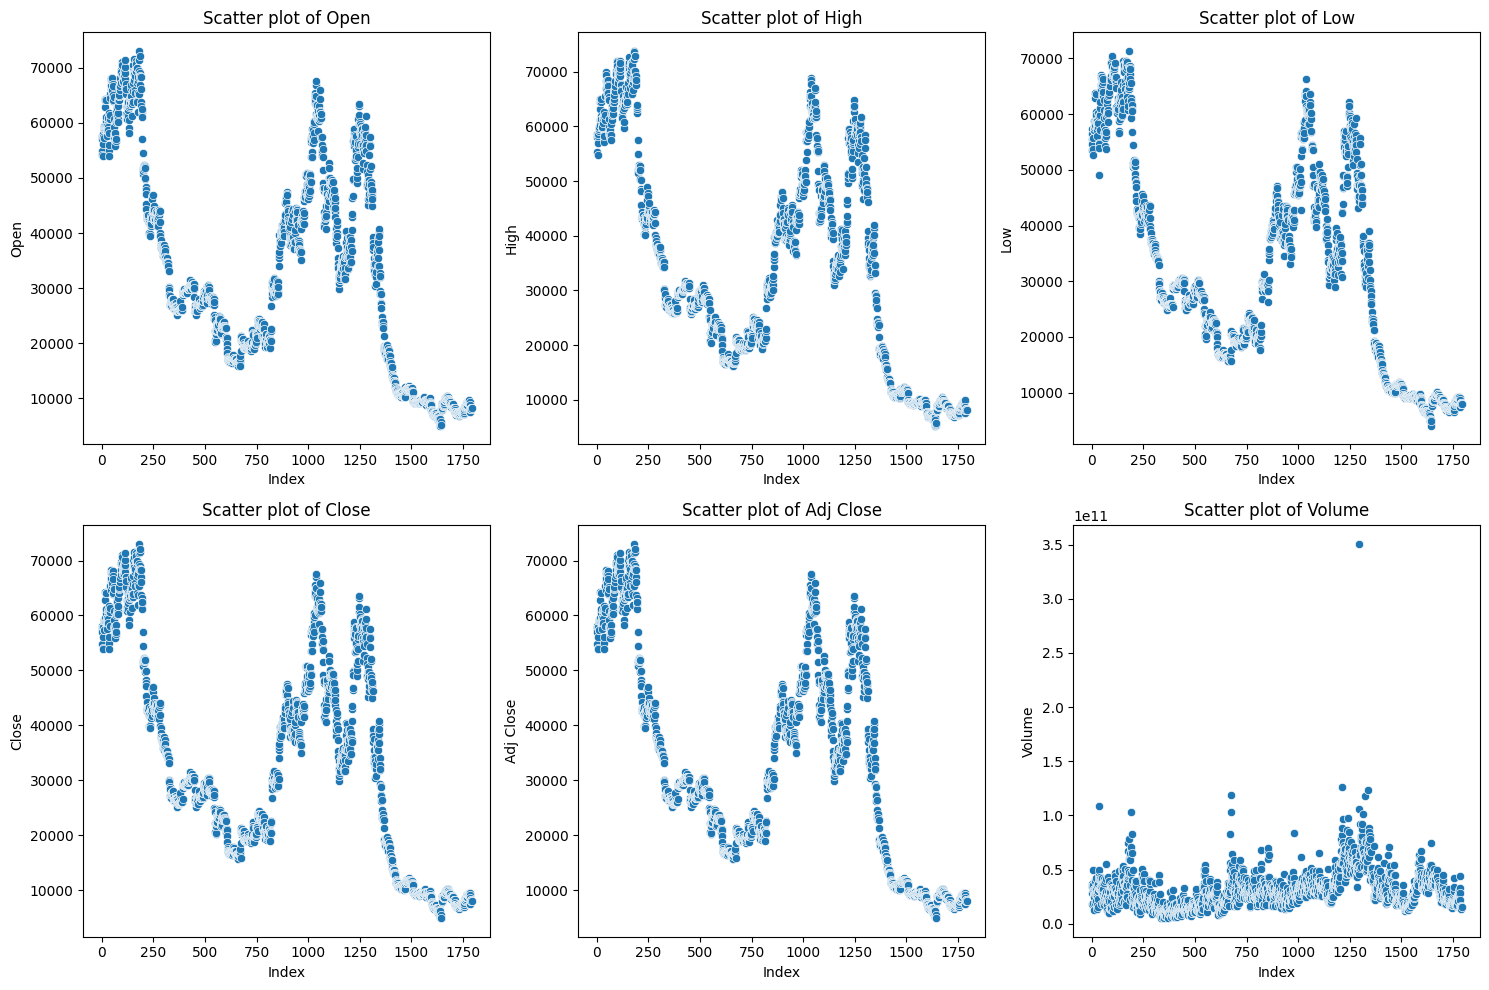

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.scatterplot(x=df.index, y=df[col], ax=axes[i])
    axes[i].set_title(f'Scatter plot of {col}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# **Bivariate Graphical Analysis**

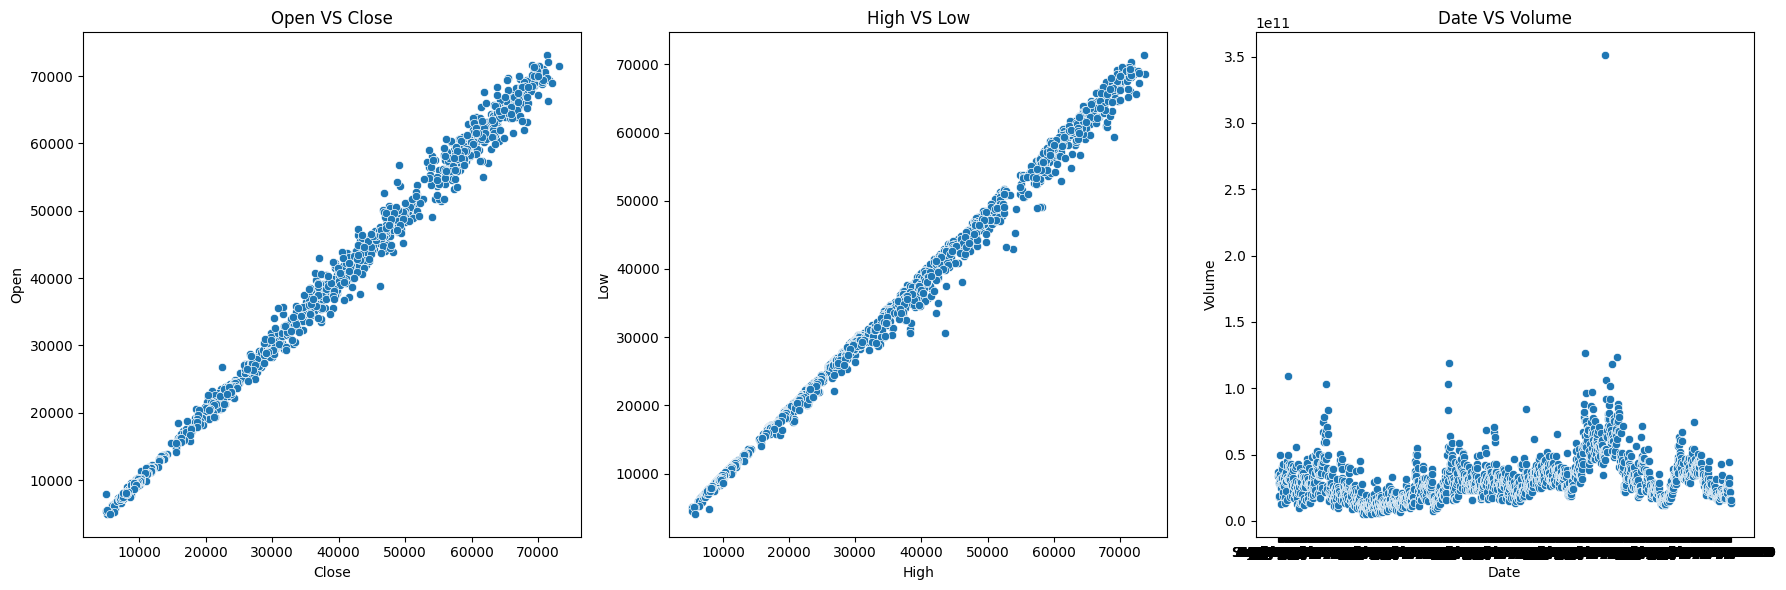

In [ ]:
scatter_plots = [
    ('Close', 'Open', 'Open VS Close'),
    ('High', 'Low', 'High VS Low'),
    ('Date', 'Volume', 'Date VS Volume')
]

# Set up the grid for scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # One row, three columns
axes = axes.flatten()  # Flatten the grid for easy iteration

# Create each scatter plot
for i, (x_col, y_col, title) in enumerate(scatter_plots):
    sns.scatterplot(x=df[x_col], y=df[y_col], ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

# **Multivariate Graphical Analysis**

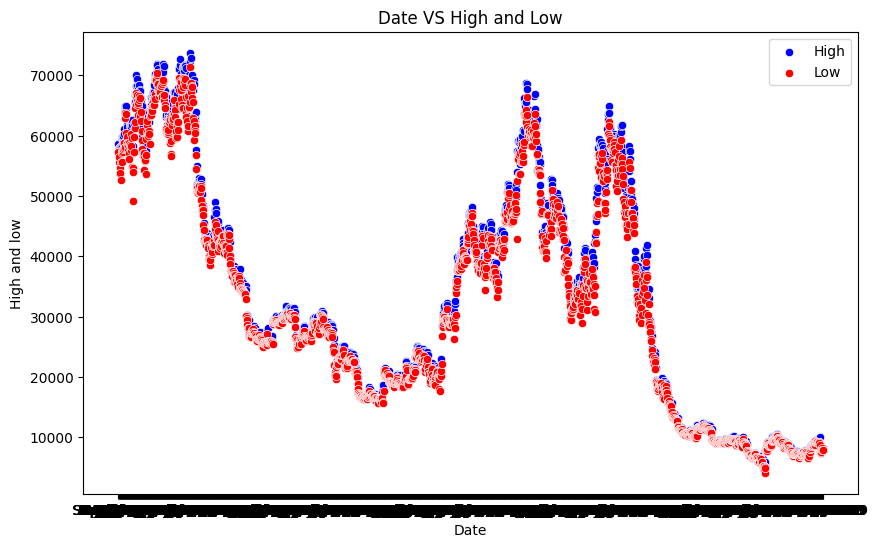

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Date'], y=df['High'], label='High', color='blue')
sns.scatterplot(x=df['Date'], y=df['Low'], label='Low', color='red')

# Add titles and labels
plt.title('Date VS High and Low')
plt.xlabel('Date')
plt.ylabel('High and low')
plt.legend()
plt.show()


# **WHAT WE ARE PREDICTING**
Using normalized data as it helps with faster convergence during training and makes it less likely that the model
gets "stuck" in local minima. Also if any one of the value is significantly large it will give unnecessary importance
to it which can result in model baisness.

predicting the 'Close' price as it will reflect the end-of-day market sentiment for the day and
provide a meaningful trend to analyze that weather we should invest our funds or we have to withdraw them.

In [ ]:
# Convert 'Date' column to datetime and sort all of the data by date
Normalize_df["Date"] = pd.to_datetime(Normalize_df["Date"], format="%b %d, %Y")
Normalize_df = Normalize_df.sort_values(by="Date").reset_index(drop=True)
print(Normalize_df)

           Date      Open      High       Low     Close  Adj Close    Volume
0    2019-10-18  0.045513  0.041021  0.056453  0.044080   0.044080  0.029859
1    2019-10-19  0.043645  0.040206  0.057087  0.044306   0.044306  0.024496
2    2019-10-20  0.043998  0.043117  0.057156  0.047734   0.047734  0.029433
3    2019-10-21  0.047337  0.043334  0.060830  0.048052   0.048052  0.030487
4    2019-10-22  0.047605  0.043334  0.059016  0.045622   0.045622  0.033192
...         ...       ...       ...       ...       ...        ...       ...
1787 2024-09-08  0.721910  0.730347  0.737006  0.732180   0.732180  0.037430
1788 2024-09-09  0.732251  0.770398  0.751058  0.764156   0.764156  0.084733
1789 2024-09-10  0.764101  0.770235  0.778145  0.773393   0.773393  0.068067
1790 2024-09-11  0.773358  0.769670  0.765470  0.768908   0.768908  0.091767
1791 2024-09-12  0.768846  0.777607  0.791691  0.780416   0.780416  0.082470

[1792 rows x 7 columns]


# ***LSTM Deep Learning Model***



The model we are using here is a Long Short-Term Memory (LSTM) neural network, which is a type of Recurrent Neural Network (RNN). The LSTM model is specifically designed to handle time-series data, where the goal is to predict future values based on past values. In the context of your dataset, we are predicting the future stock prices (specifically the Close price of a stock or coin) based on the historical prices.

Sequential Data: LSTM is specifically designed for time-series and sequential data, where the current prediction depends on previous time steps (past data points). In the case of stock prices, future prices are often correlated with past prices, making LSTM a good choice

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0609 - val_loss: 0.0026
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.1876e-04 - val_loss: 0.0013
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.9591e-04 - val_loss: 0.0012
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.2561e-04 - val_loss: 0.0011
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6819e-04 - val_loss: 8.8319e-04
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5243e-04 - val_loss: 9.7984e-04
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0726e-04 - val_loss: 0.0014
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9804e-04 - val_loss: 9.4438e-04
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0218e-04 - val_loss: 0.0011
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3307e-04 - val_loss: 0.0017
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6.3505e-04 - val_loss: 0.0012
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━

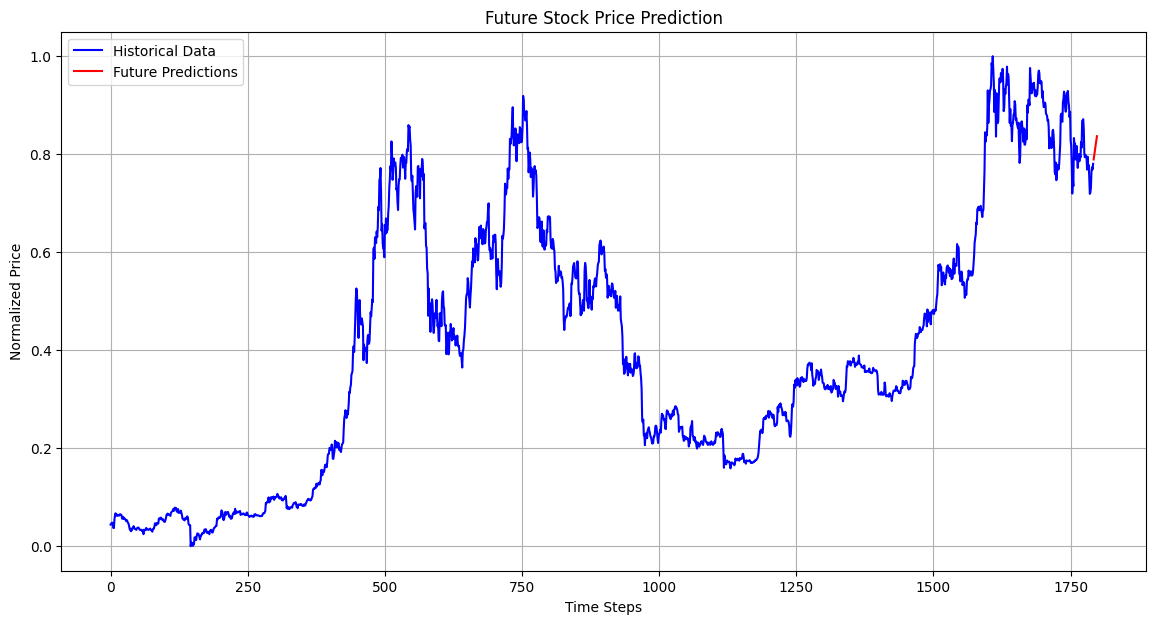

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


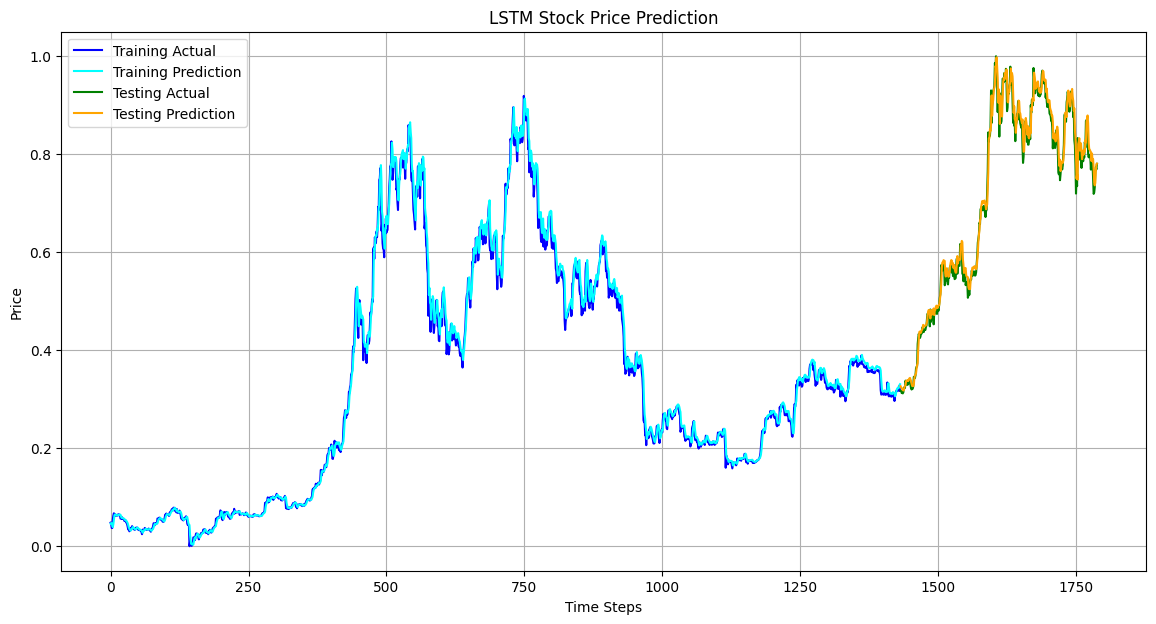


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.0005642447596586244
Mean Absolute Error (MAE): 0.017180192384504064
R-squared (R2): 0.9860784299966777


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Convert 'Date' column to datetime and sort by date
# Normalize_df["Date"] = pd.to_datetime(Normalize_df["Date"], format="%b %d, %Y")
# Normalize_df = Normalize_df.sort_values(by="Date").reset_index(drop=True)

# Prediction ho rhi on the close column
scaled_data = Normalize_df["Close"].values.reshape(-1, 1)

# Prepare data for LSTM model
look_back = 3  # Define time steps to look back for prediction

# Create the sliding window dataset
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i + look_back, 0])
    y.append(scaled_data[i + look_back, 0])

X, y = np.array(X), np.array(y)

# Reshape X for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into 20 and 80 ratio
train_ratio = 0.8
split_index = int(len(X) * train_ratio) + 1
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model (unchanged)
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Function to predict future prices (unchanged)
def predict_future(model, last_sequence, days_to_predict):
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(days_to_predict):
        prediction = model.predict(current_sequence.reshape(1, look_back, 1))
        predictions.append(prediction[0, 0])
        # Slide the window forward
        current_sequence = np.append(current_sequence[1:], prediction[0, 0]).reshape(look_back, 1)

    return np.array(predictions)

# Get the last sequence from the training data for future prediction
last_sequence = scaled_data[-look_back:]

# Predict the next 7 days (or any desired number of days)
future_days = 7
future_predictions = predict_future(model, last_sequence, future_days)

# Inverse transform predictions and actual values for visualization
future_predictions_actual = future_predictions

# Print future predictions
print("\nFuture Predictions:")
for i, prediction in enumerate(future_predictions_actual):
    print(f"Day {i+1}: {prediction:.6f}")

# Plot the historical data and future predictions
plt.figure(figsize=(14, 7))
plt.plot(range(len(scaled_data)), scaled_data, label="Historical Data", color="blue")
plt.plot(range(len(scaled_data), len(scaled_data) + future_days), future_predictions_actual, label="Future Predictions", color="red")
plt.title("Future Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict_actual = train_predict.reshape(-1, 1)
test_predict_actual = test_predict.reshape(-1, 1)
y_train_actual = y_train.reshape(-1, 1)
y_test_actual = y_test.reshape(-1, 1)

# Visualization of predictions vs actual for training and testing
plt.figure(figsize=(14, 7))
plt.plot(y_train_actual, label="Training Actual", color="blue")
plt.plot(train_predict_actual, label="Training Prediction", color="cyan")
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label="Testing Actual", color="green")
plt.plot(range(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), test_predict_actual, label="Testing Prediction", color="orange")
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Evaluate the model performance
mse = mean_squared_error(y_test_actual, test_predict_actual)
mae = mean_absolute_error(y_test_actual, test_predict_actual)
r2 = r2_score(y_test_actual, test_predict_actual)

print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# **(RNN) Recurrent Neural Network (DL Model)**

---



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0624
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9273e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8613e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.4699e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.3974e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1843e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.6952e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5468e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7992e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.9076e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4371e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8651e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9073e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

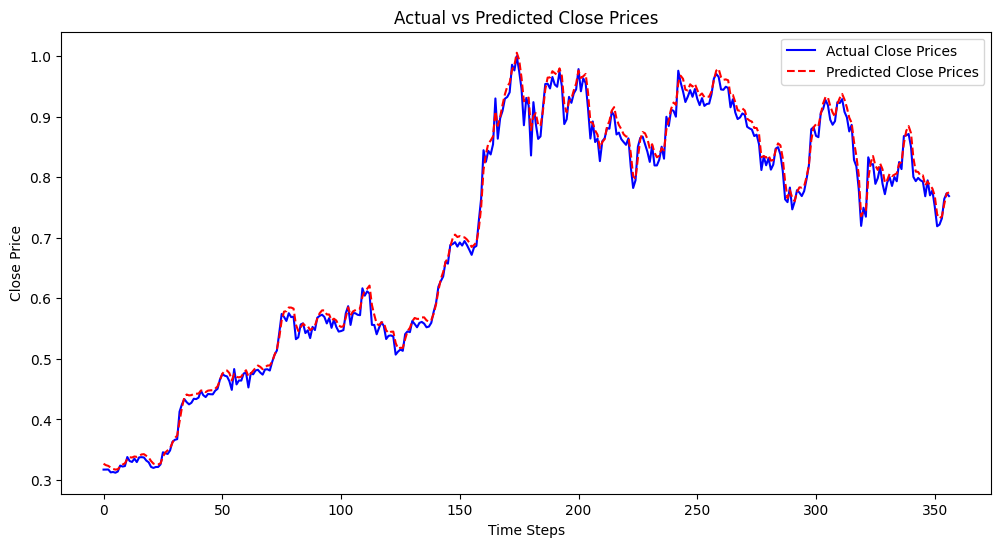

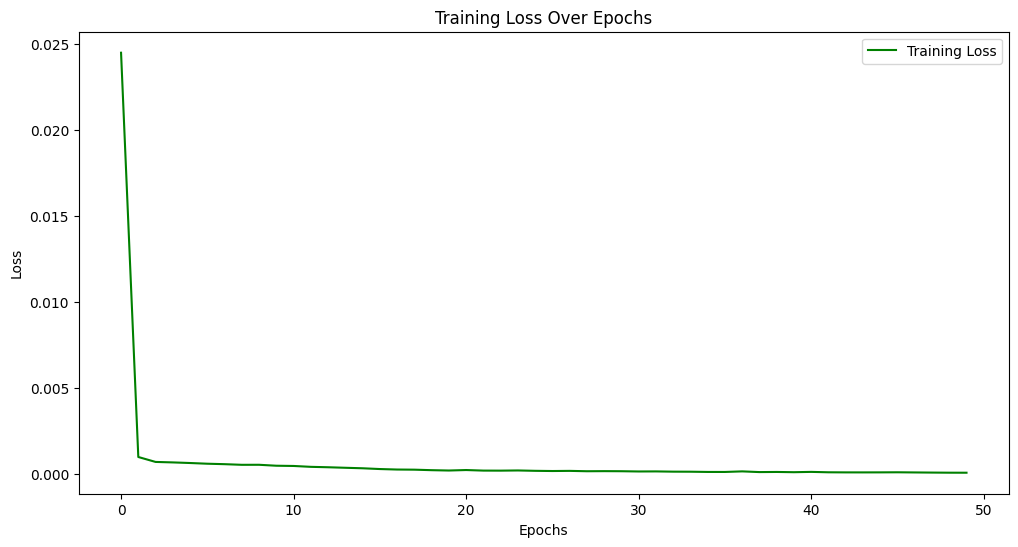

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming Normalize_df is already defined and has the data you need
data = Normalize_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].values

def create_sequences(data, seq_length):
    seqData = []  # Contains sequences of past days' data and the close of the next day
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]  # Feature sequence
        nextClose = data[i + seq_length - 1, 3]  # Target is 'Close', which is at index 3
        seqData.append((seq, nextClose))
    return seqData

seq_length = 10  # Number of previous days to use for prediction
sequences = create_sequences(data, seq_length)

# Prepare features (X) and target (y)
X, y = zip(*sequences)
X = np.array(X)
y = np.array(y)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([LSTM(50, activation='tanh', input_shape=(X.shape[1], X.shape[2])), Dense(1)])
# using default linear activation function for output layer not softamx as it is designed for classification tasks
# and outputs probabilities, where as continuous real values is required. Softmax will constrain output to a probability
# distribution, which is unsuitable for predicting arbitrary real numbers like prices.
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict on test data
y_pred_rnn = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_rnn)
mae = mean_absolute_error(y_test, y_pred_rnn)
rmse = np.sqrt(mse)

# Since we have bitcoin data having continous values, so accuracy will not be the best option as it is used when you
# are predicting class labels and also our data is continuous.
# So instead of accuracy we can calculate mean sq. error, mean absolute error and root mean sq. error
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# dates = Normalize_df["Date"].values[-len(y_test):]
# print("Length of dates:", len(dates)) #357
# print("Length of Actual Close (y_test):", len(y_test))   #357
# print("Length of Predicted Close (RNN, y_pred):", len(y_pred_rnn))  #357
# print(dates[0]) #23/9/22

# Visualizing Actual vs Predicted Values for Close price
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Close Prices", color='blue')
plt.plot(y_pred_rnn, label="Predicted Close Prices", color='red', linestyle='dashed')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training Loss", color='green')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# ***Random Forest (ML Model)***

Mean Absolute Error (MAE): 0.014329785589974556
R-squared (R²): 0.9871534671380663


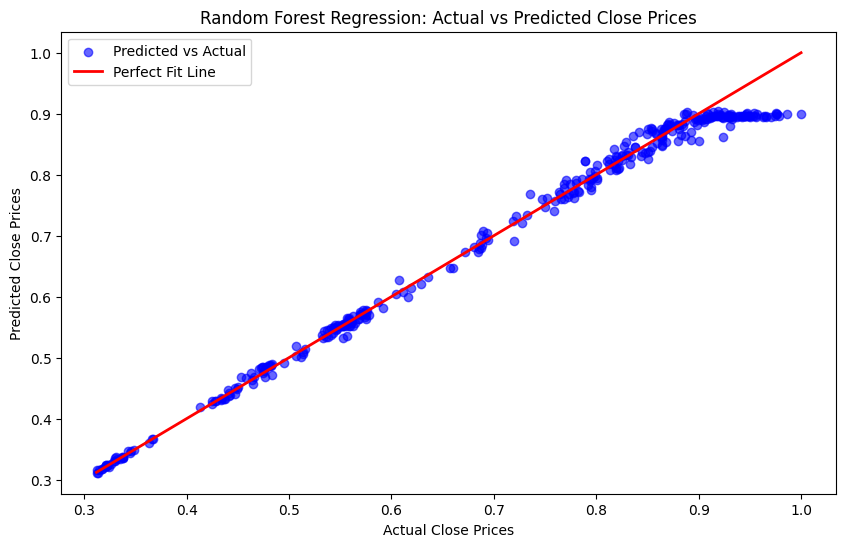

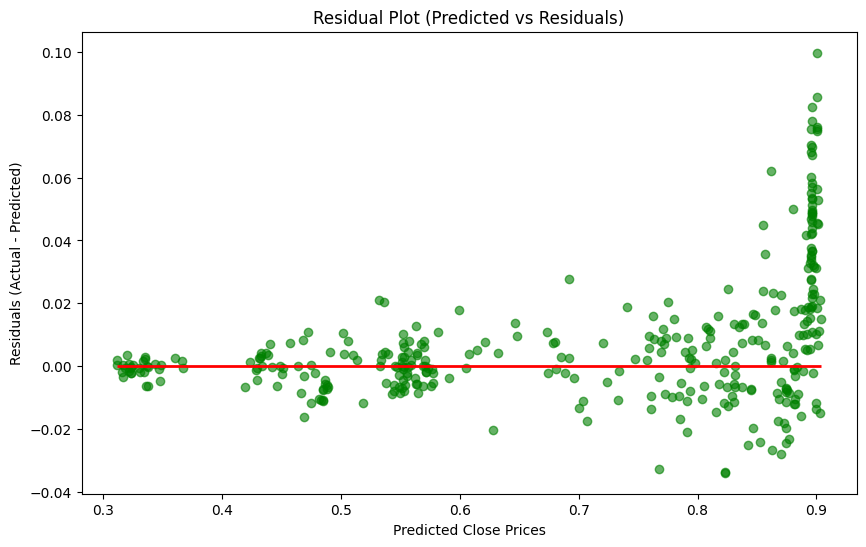

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming Normalize_df is already normalized
# Features and target for the normalized data
features = Normalize_df[["Open", "High", "Low", "Volume"]]
target = Normalize_df["Close"]

# Splitting the normalized data into training and testing sets
train_size = int(len(features) * 0.8) + 2
X_train, X_test = features[:train_size], features[train_size:]
y_train, y_test = target[:train_size], target[train_size:]
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the Random Forest Regressor on normalized data
rf_model_normalized = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_normalized.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_model_normalized.predict(X_test)

# Evaluating the model on normalized data
mae_normalized = mean_absolute_error(y_test, y_pred_rf)
r2_normalized = r2_score(y_test, y_pred_rf)

# Displaying results
print("Mean Absolute Error (MAE):", mae_normalized)
print("R-squared (R²):", r2_normalized)

# dates = Normalize_df["Date"].values[-len(y_test):]
# print("Length of dates:", len(dates)) #357
# print("Length of Actual Close (y_test):", len(y_test)) #357
# print("Length of Predicted Close (Random Forest, y_pred):", len(y_pred_rf)) #357
# print(dates[0]) # 23/9/22

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit Line')
plt.title("Random Forest Regression: Actual vs Predicted Close Prices")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.legend()
plt.show()

# Plotting the residuals (difference between actual and predicted values)
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, color='green', alpha=0.6)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='red', lw=2)
plt.title("Residual Plot (Predicted vs Residuals)")
plt.xlabel("Predicted Close Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

In [ ]:
# Extract the corresponding dates for the test set
dates = Normalize_df["Date"].values[-len(y_test):]

In [ ]:
# Create a DataFrame with dates, actual output, and predicted outputs
output_df = pd.DataFrame({
    "Date": dates,
    "Actual Close": y_test,
    "Predicted Close (LSTM)": test_predict_actual.flatten(),
    "Predicted Close (RNN)": y_pred_rnn.flatten(),  # Flatten to ensure 1D for RNN predictions
    "Predicted Close (Random Forest)": y_pred_rf
})
# Save to CSV
output_df.to_csv("model_predictions.csv", index=False)
print("CSV file 'model_predictions.csv' created successfully!")

CSV file 'model_predictions.csv' created successfully!


In [ ]:
dates = Normalize_df["Date"].values[-len(y_test):]
print("Length of dates:", len(dates))
print("Length of Actual Close (y_test):", len(y_test))
print("Length of Predicted Close (RNN):", len(y_pred_rnn))
print("Length of Predicted Close (Random Forest):", len(y_pred_rf))
print("Length of Predicted Close (LSTN):", len(test_predict_actual))


Length of dates: 357
Length of Actual Close (y_test): 357
Length of Predicted Close (RNN): 357
Length of Predicted Close (Random Forest): 357
Length of Predicted Close (LSTN): 357


In [ ]:
Normalize_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-18,0.045513,0.041021,0.056453,0.044080,0.044080,0.029859
1,2019-10-19,0.043645,0.040206,0.057087,0.044306,0.044306,0.024496
2,2019-10-20,0.043998,0.043117,0.057156,0.047734,0.047734,0.029433
3,2019-10-21,0.047337,0.043334,0.060830,0.048052,0.048052,0.030487
4,2019-10-22,0.047605,0.043334,0.059016,0.045622,0.045622,0.033192
...,...,...,...,...,...,...,...
1787,2024-09-08,0.721910,0.730347,0.737006,0.732180,0.732180,0.037430
1788,2024-09-09,0.732251,0.770398,0.751058,0.764156,0.764156,0.084733
1789,2024-09-10,0.764101,0.770235,0.778145,0.773393,0.773393,0.068067
1790,2024-09-11,0.773358,0.769670,0.765470,0.768908,0.768908,0.091767


In [ ]:
Normalize_df.to_csv("Normalized_Data.csv", index=False)
print("CSV file 'Normalized_Data.csv' created successfully!")

CSV file 'Normalized_Data.csv' created successfully!
